## K-means

### Análisis de Datos 
### Grupo: 49

#### Julian Samboni Muñoz 
#### Laura Nataly Sánchez Ortiz 
#### Mateo Leiva Bermudez

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre las variables, valores atípicos, tendencias, etc.

In [150]:
# Importamos las Librerias 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px

# Librerias para implementar el modelo k-means 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Librerías para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Libreria para evitar la advertencia de que el modelo de KMeans tiene una perdida de memoria en Windows 
import warnings 
warnings.filterwarnings('ignore')


In [16]:
# Cargamos el DataSet y mostramos las 5 primeras filas 
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

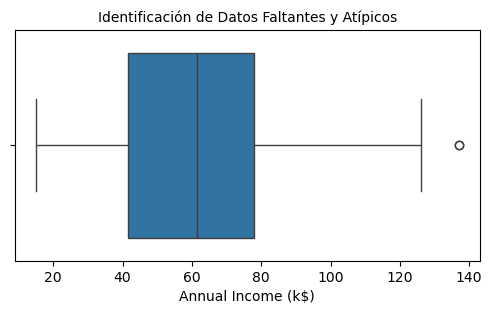

In [20]:
# Identificación de Datos Faltantes Atípicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)


## 2 Procesar los Datos limpiandolos, tratando valores faltantes y transformandolos según sea necesario 

In [35]:
print("Cantidad de registros con cero en Age: ", data['Age'].isin([0]).sum())
print("Cantidad de registro con cero en Annual Income (k$): ", data['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de registro con cero en Spending Score (1-100): ", data['Spending Score (1-100)'].isin([0]).sum())


Cantidad de registros con cero en Age:  0
Cantidad de registro con cero en Annual Income (k$):  0
Cantidad de registro con cero en Spending Score (1-100):  0


In [37]:
# Remplazamos todos los ceros con el valor medio o promedio de la columna 
data['Age']=data['Age'].replace(0,data['Age'].mean())
data['Annual Income (k$)']=data['Annual Income (k$)'].replace(0,data['Annual Income (k$)'].mean())
data['Spending Score (1-100)']=data['Spending Score (1-100)'].replace(0,data['Spending Score (1-100)'].mean())

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

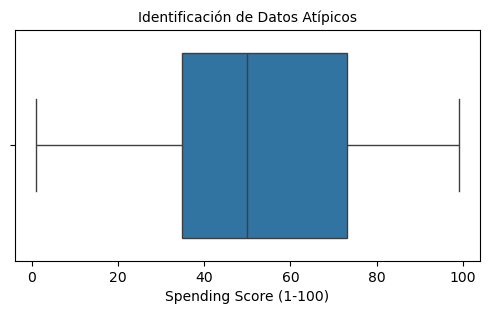

In [39]:
# Identificacion de Datos Atipicos 
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10)

In [53]:
# Conteo de Datos Atípicos 
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((data['Annual Income (k$)']<nivel_maximo)&(data['Annual Income (k$)']>nivel_minimo)).sum()
print("El total de datos Atípicos es {}".format(Total_Atipicos))

El total de datos Atípicos es 186


In [47]:
# Revisión del tipo de Datos y Datos Faltantes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizado selección de características 

In [56]:
# Filtrar columnas del modelo
data=data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [58]:
# Revisión de los Datos de la variables objetivos 
data.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


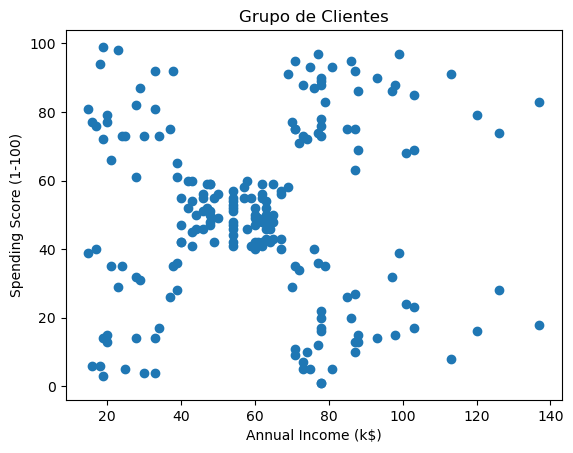

In [60]:
# Grafica Antes del Agrupamiento
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupo de Clientes')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparametros

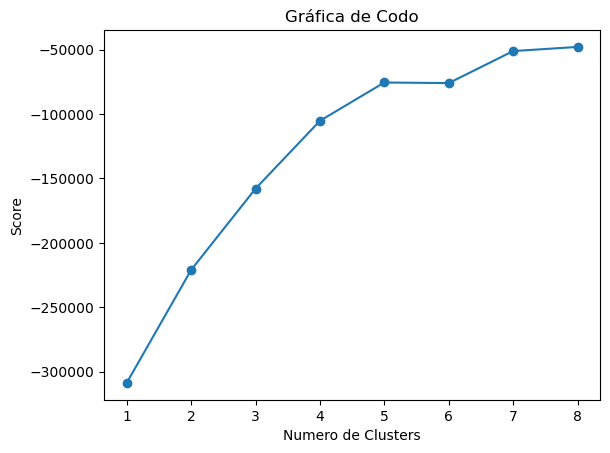

In [82]:
# Se realiza gráfica de codo para identificar valor de k
Nc=range(1, 9)
kmeans=[KMeans(n_clusters=i) for i in Nc]
kmeans
score=[kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
score
plt.plot(Nc, score, marker='o')
plt.xlabel('Numero de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [186]:
# Generación del modelo de Agrupamiento del modelo con k=6 (haremos 6 grurupos de agrupamiento)
Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(data)

KMeans(n_clusters=5, random_state=0)

# Se agrega la columna Grupo a la BD para identificar el numero del grupo del agrupamiento
Modelo.labels_
data["Columna"]= Modelo.labels_
print(data)

### 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [188]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(data)
X = data.drop('Grupo', axis=1)
clusters = data['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_datas = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_datas, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.4513853869922196 |
| Indice Calinski Harabasz | 166.65535908980675 |
|  Indice Davies Bouldin   | 0.7515031124353508 |
+--------------------------+--------------------+


### 6. Realizar las diferentes graficas que permitan visualizar los resultados del modelo

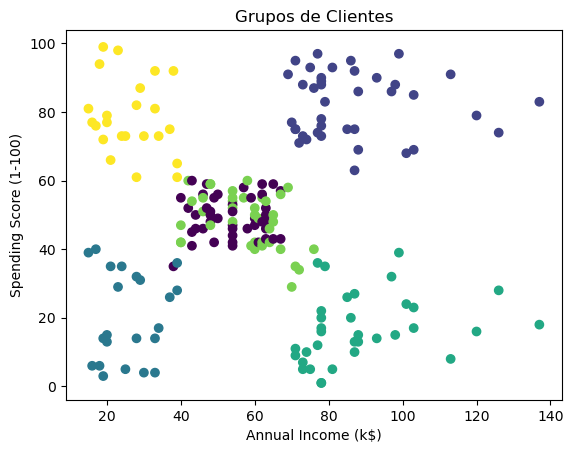

In [190]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Grupo'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()

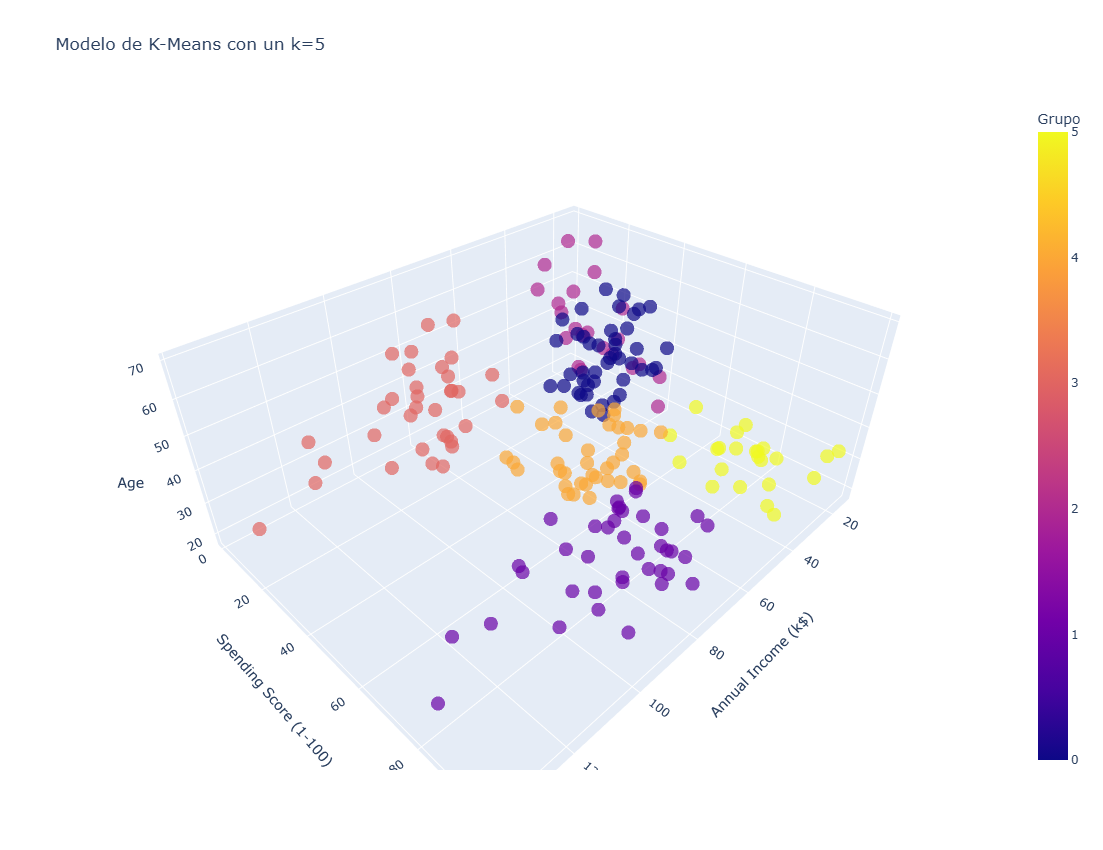

In [180]:
# Creamos un modelo en 3D de los Datos agrupados
Grafica_3D = px.scatter_3d(data, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={5}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

### 7. Interpretar, analizar y documentar los resultados obtenidos 

#### Coeficiente de Silhouette

##### El análisis de Silhouette, nos permite evidencias que es de 0.451 que, aunque no es 1; aun así, nos permite evidenciar una buena separación de entre los grupos.

#### Índice de Calinski-Harabasz:

##### La puntuación de Calinski Harabasz es de 166.65 lo cual nos deja evidenciar que el Calinski Harabasz sugiere que los clústeres están bien separados y compactos. Es decir, los puntos dentro de cada clúster están cerca entre sí, y los clústeres están distantes unos de otros.

#### Índice Davies Bouldin:

##### Tras el análisis de Davies Bouldin con una puntuación de 0.751 que es una puntuación razonable; lo que indica que están bien separados y compactos, lo que es una señal de que el modelo de es bueno.